In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
data=pd.read_csv('webtraffic.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Hour Index  4896 non-null   int64
 1   Sessions    4896 non-null   int64
dtypes: int64(2)
memory usage: 76.6 KB


Hour Index    0
Sessions      0
dtype: int64

In [42]:
data.columns

Index(['Hour Index', 'Sessions'], dtype='object')

In [106]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 4870 entries, 0 to 4895
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hour Index       4870 non-null   int64  
 1   Sessions         4870 non-null   int64  
 2   Sessions_zscore  4870 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 152.2 KB


,Hour Index,Sessions,Sessions_zscore
count,4870.000000,4.870000e+03,4.870000e+03
mean,2443.177413,2.233266e+09,9.337728e-17
std,1415.585565,8.805830e+08,1.000000e+00
min,0.000000,5.708566e+08,-1.887851e+00
25%,1217.250000,1.527940e+09,-8.009771e-01
50%,2434.500000,2.081830e+09,-1.719728e-01
75%,3673.750000,2.958823e+09,8.239508e-01
max,4895.000000,4.848289e+09,2.969649e+00


In [43]:
data.head()

,Hour Index,Sessions
0,0,1418159421
1,1,1113769116
2,2,919158921
3,3,822352824
4,4,735526737


In [107]:
data.isnull().sum()
data.fillna(data.mean(),inplace=True)
data.isnull().sum()

Hour Index         0
Sessions           0
Sessions_zscore    0
dtype: int64

In [45]:
sessions = data['Sessions'].values

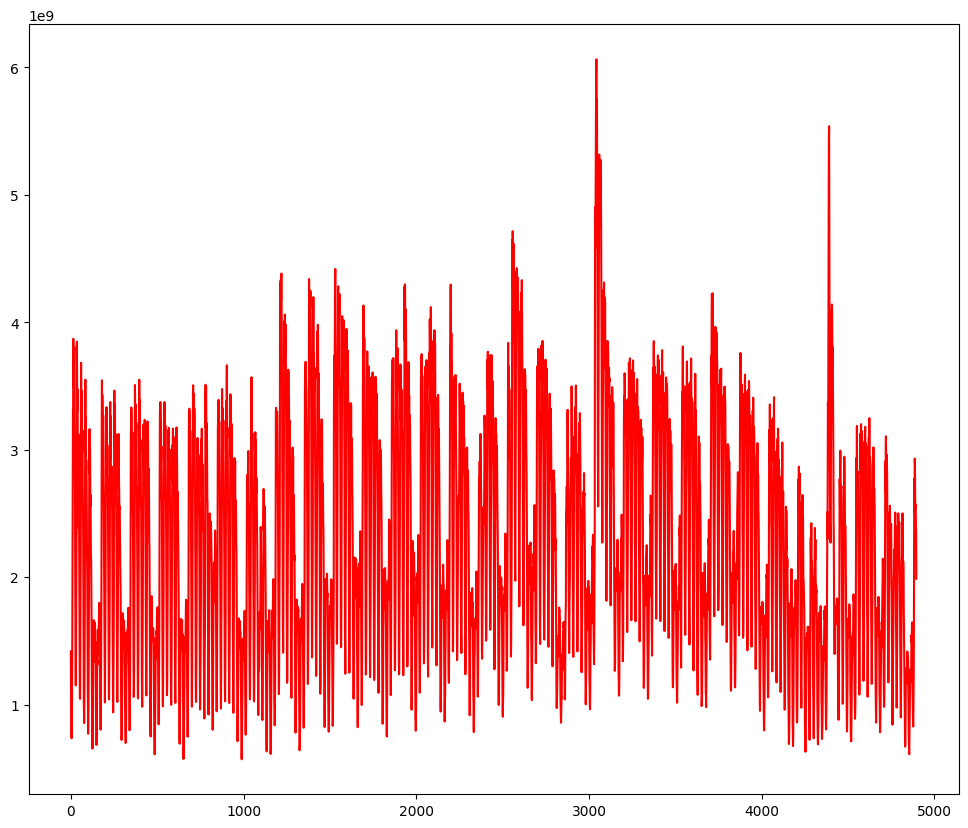

In [32]:
ar = np.arange(len(sessions))
plt.figure(figsize=(12,10))
plt.plot(ar, sessions,'r')
plt.show()


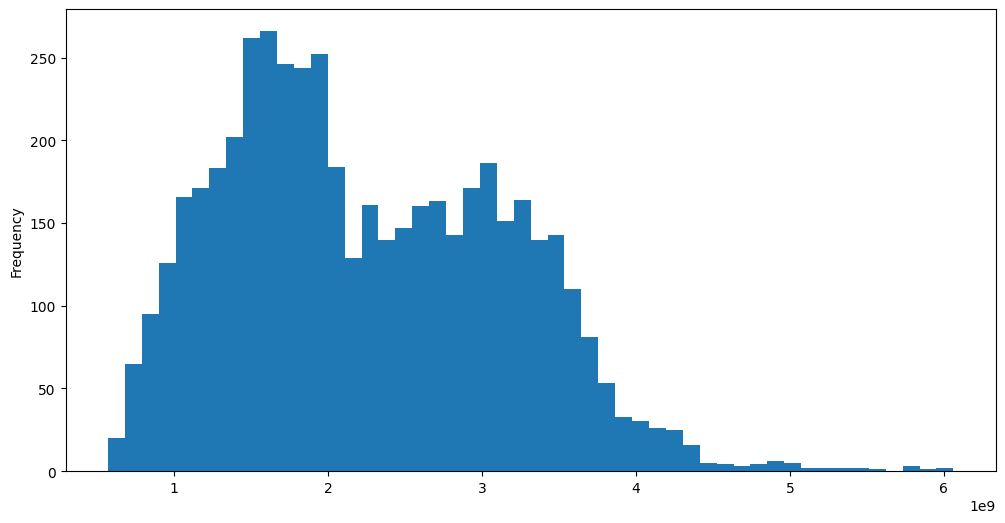

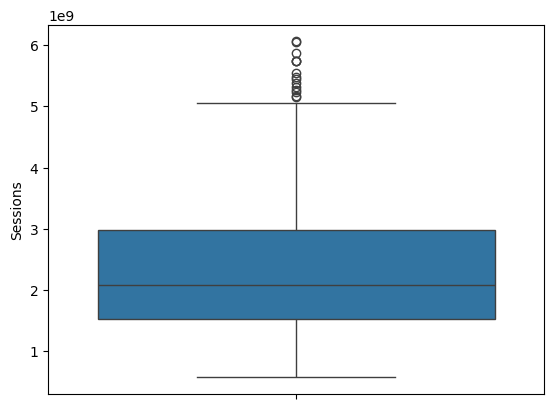

In [52]:
data['Sessions'].plot(kind='hist',bins=50,figsize=(12,6))
plt.show()  

sns.boxplot(data['Sessions'])   
plt.show()

threshold = 3


In [56]:

data['Sessions_zscore'] = (data['Sessions'] - data['Sessions'].mean())/data['Sessions'].std()
data['Sessions_zscore'].head()



0   -0.925645
1   -1.271314
2   -1.492315
3   -1.602249
4   -1.700850
Name: Sessions_zscore, dtype: float64

In [ ]:
outliers = data[np.abs(data['Sessions_zscore']) > threshold]
outliers

data_clean = data[np.abs(data['Sessions_zscore']) <= threshold]

data_clean.shape

data_clean.head()



,Hour Index,Sessions,Sessions_zscore
0,0,1418159421,-0.925645
1,1,1113769116,-1.271314
2,2,919158921,-1.492315
3,3,822352824,-1.602249
4,4,735526737,-1.700850


In [ ]:
data_clean.columns
#data_clean.drop('Sessions_zscore',axis=1,inplace=True)

data_clean.head()

X = data_clean.drop('Sessions', axis=1)
y = data_clean['Sessions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)





In [98]:
def prepare_data(seq, num):
    x = []
    y = []
    for i in range(0, (len(seq) - num), 1):
        input_ = seq[i:i + num]
        output = seq[i + num]
        x.append(input_)
        y.append(output)
    return np.array(x), np.array(y)

In [100]:
num=3584
x,y= prepare_data(sessions,num)
print(len(x))

1292


In [101]:
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow import keras

In [104]:
# define model
model =  Sequential()
model.add(LSTM(128,input_shape=(16,1)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='linear'))

In [105]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,881 (292.50 KB)

 Trainable params: 74,881 (292.50 KB)

 Non-trainable params: 0 (0.00 B)